In [3]:
import torch
from sentence_transformers import SentenceTransformer, util

In [4]:
model = SentenceTransformer('distiluse-base-multilingual-cased-v1')

In [5]:
embeddings = model.encode(['Hello World', 'Hallo Welt', 'Hola mundo'])
print(embeddings)

[[ 0.03346377  0.00484745 -0.04678713 ...  0.01511979 -0.03623771
  -0.06323168]
 [ 0.04559842  0.01505487 -0.05186234 ...  0.00402891 -0.03008039
  -0.05890044]
 [ 0.05262217  0.03586337 -0.05460796 ... -0.02830479 -0.05466484
  -0.02503221]]


In [6]:
embeddings[0]

array([ 3.34637724e-02,  4.84744739e-03, -4.67871316e-02,  3.98983108e-03,
       -1.78191904e-03, -3.41470689e-02,  2.87648253e-02, -1.55432103e-02,
       -5.04796915e-02, -3.62706464e-03,  2.29729712e-02, -6.91497773e-02,
        3.30682546e-02,  2.91692447e-02, -3.82758118e-02,  6.60445914e-03,
        3.41652296e-02,  3.24416682e-02,  6.42887428e-02, -2.88050566e-02,
        2.68871337e-02, -1.84085220e-04,  5.46715260e-02,  7.77465664e-03,
        2.36682389e-02, -2.09266022e-02,  5.83269000e-02, -2.53731515e-02,
       -4.05530185e-02, -4.35878104e-03,  3.92166525e-03, -2.98065841e-02,
       -4.09040153e-02, -7.05195889e-02,  5.23748733e-02, -5.08956946e-02,
       -2.77044997e-02,  2.80283298e-03,  7.56072951e-03, -7.09892511e-02,
        4.89938110e-02, -9.53660160e-03, -5.32356016e-02,  5.19303344e-02,
        5.23585230e-02,  4.84819077e-02,  4.77733873e-02,  7.05985129e-02,
        2.79467180e-02,  2.12197118e-02,  1.33188572e-02, -3.39721031e-02,
       -3.04463897e-02, -

In [7]:
embeddings[0].shape

(512,)

In [8]:
embeddings.shape

(3, 512)

In [9]:
corpus = [
    ## Comidas
    "vende-se cachorro quente no bar da esquina",
    "compro tapioca e pizza no bar ao lado",
    "gosto de pizza de calabresa",
    
    ## Praia/Surf
    "gosto de ir para a praia em novembro",
    "aprender a surfar no mar deve ser legal",

    
    ## Universidade
    "a universidade é um local para se estudar muito",
    "a universidade de ciência da computação é muito interessante",
    "gosto de estudar machine learning à noite",
    
    ## Café

    "café todos os dias é o que todos queremos",
    "a melhor forma de tomar café é passado",
    "café com pizza na universidade é comum",
]

In [10]:
def get_embeddings(sent, return_tensor=False):
    embeddings = model.encode(sent,convert_to_tensor=return_tensor)
    return embeddings

In [11]:
all_sents = get_embeddings(corpus)
all_sents

array([[ 0.00374373, -0.02478239,  0.00455412, ..., -0.00448907,
         0.04907026, -0.00034267],
       [ 0.03218857, -0.01633923, -0.01076779, ..., -0.0162769 ,
         0.01669705,  0.0338628 ],
       [ 0.05389647,  0.01480535, -0.06598361, ...,  0.04905139,
         0.01712651,  0.00926579],
       ...,
       [-0.02107196, -0.06737888, -0.05032125, ..., -0.01230112,
        -0.02975747,  0.0602976 ],
       [-0.04041922, -0.059735  ,  0.03249679, ...,  0.02985583,
        -0.00755948,  0.04217885],
       [ 0.02661374, -0.00801952, -0.02641995, ..., -0.0006445 ,
        -0.00871512,  0.07745802]], dtype=float32)

In [12]:
all_sents[0].shape

(512,)

In [13]:
## Plot embeddings in low dim space
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [14]:
## Convert vectors to TSNE
tsne=TSNE(n_components=2,perplexity = 3, method ='barnes_hut',verbose=1)
sentences_tsne = tsne.fit_transform(all_sents)
sentences_tsne

[t-SNE] Computing 10 nearest neighbors...
[t-SNE] Indexed 11 samples in 0.000s...
[t-SNE] Computed neighbors for 11 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 11 / 11
[t-SNE] Mean sigma: 0.344239
[t-SNE] KL divergence after 250 iterations with early exaggeration: 46.700787
[t-SNE] KL divergence after 1000 iterations: 0.151265


array([[ 163.18092 , -112.25053 ],
       [ 141.1787  ,  -10.634915],
       [  75.90187 ,   33.37437 ],
       [-248.67784 ,  176.79068 ],
       [-225.76906 ,  256.9308  ],
       [-174.12808 ,  -80.21677 ],
       [-231.73752 ,  -22.023428],
       [-256.41006 ,   62.397045],
       [ 283.7823  ,  178.48625 ],
       [ 353.34137 ,  144.66539 ],
       [ 189.99292 ,   67.730156]], dtype=float32)

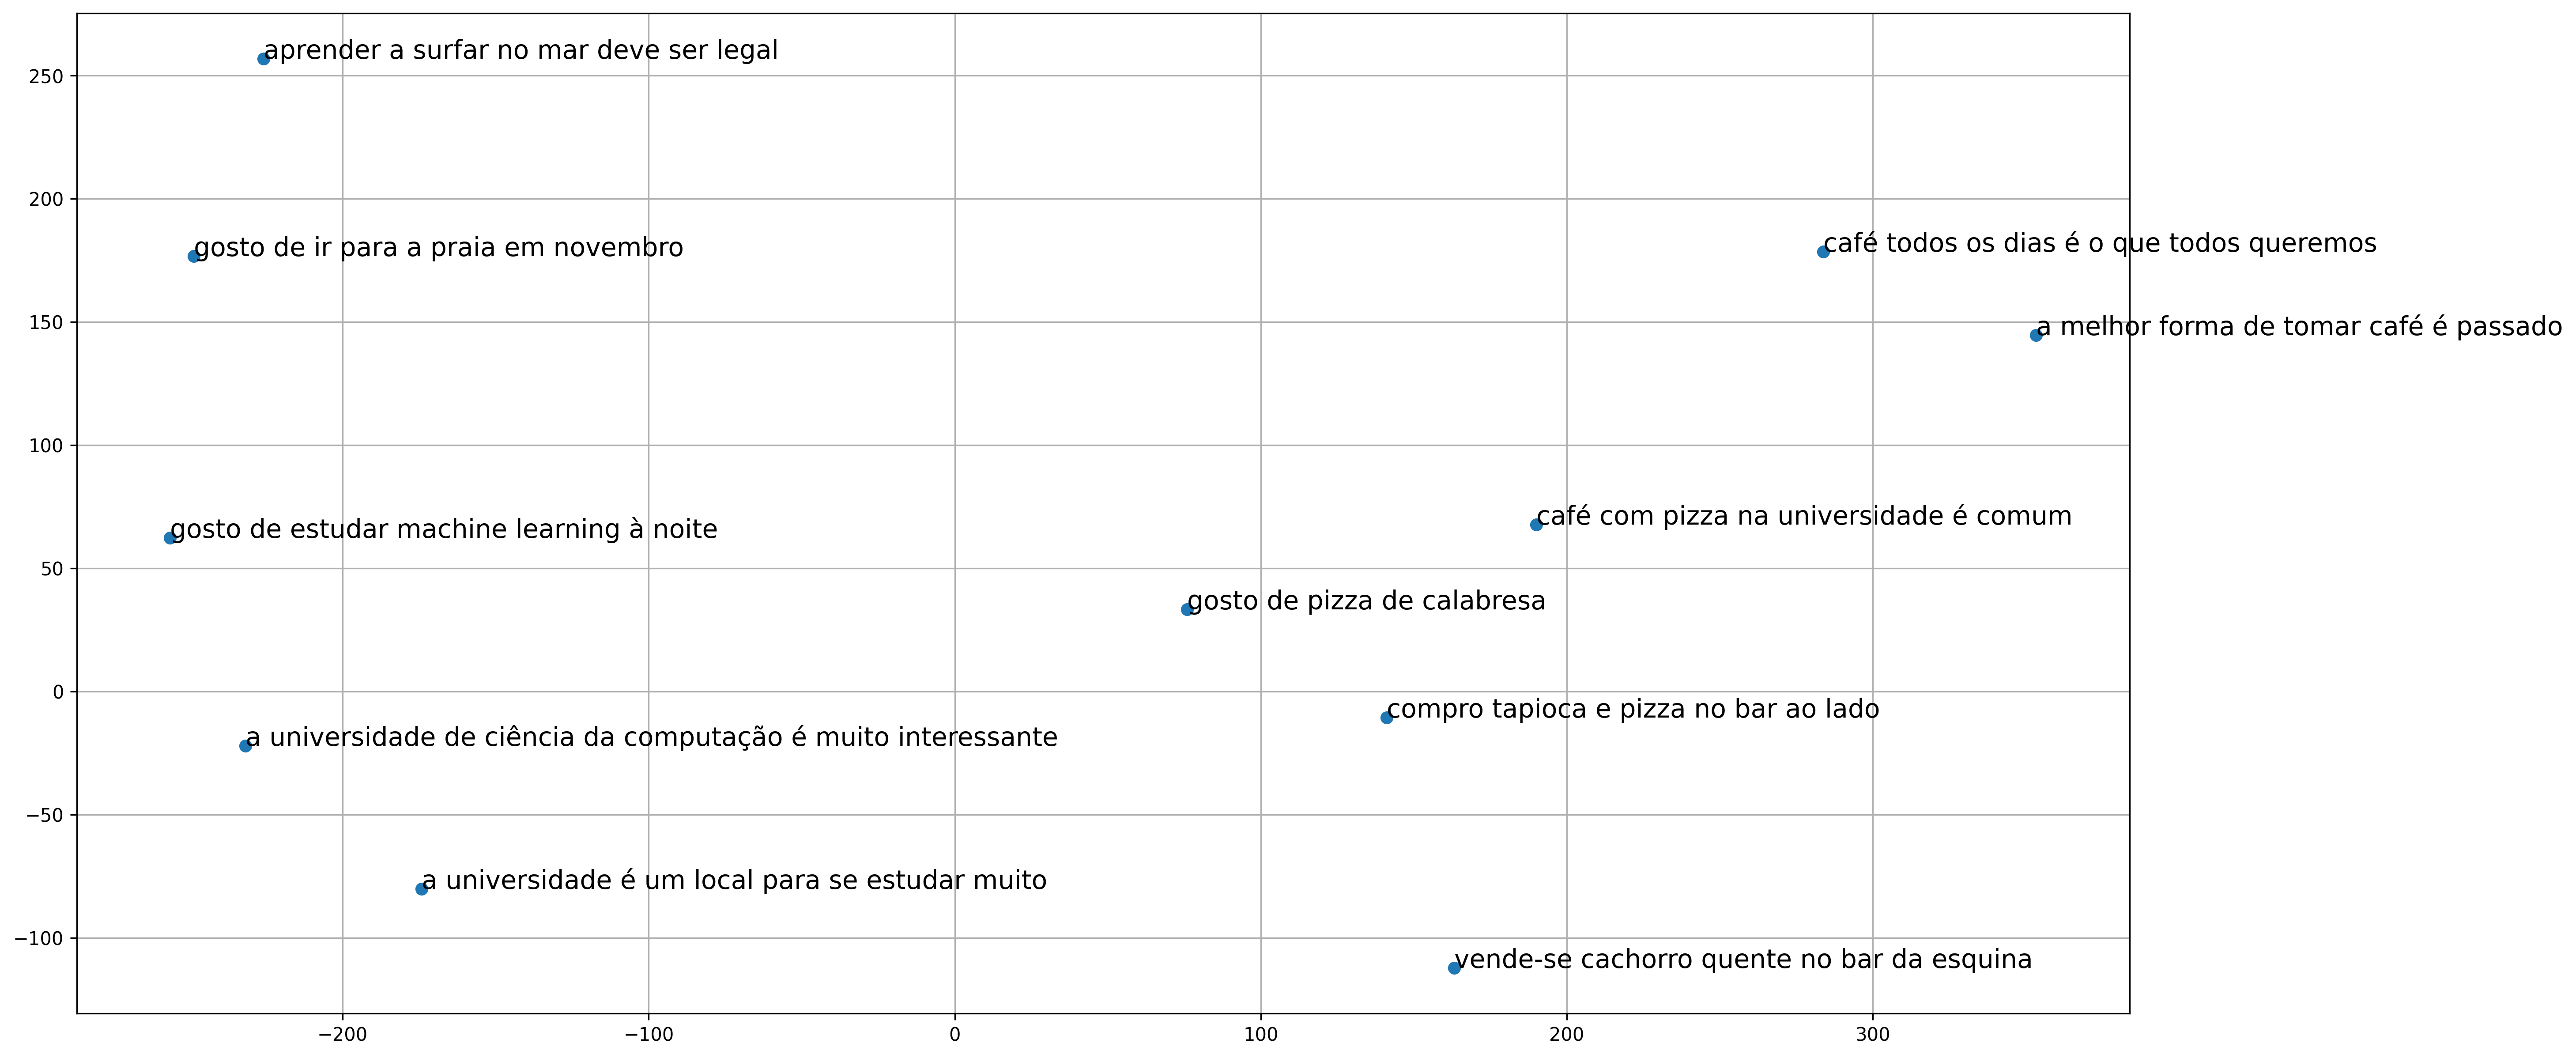

In [15]:
plt.figure(num=None, figsize=(20, 10), dpi=300, facecolor='w', edgecolor='k')
plt.grid()
plt.scatter(sentences_tsne[:,0], sentences_tsne[:,1])
for label, x, y in zip(corpus,sentences_tsne[:,0], sentences_tsne[:,1]):
    font = {'size' : 14, 'weight' : 'normal'}
    plt.rc('font', **font)
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')

## Calculate Cosine Distance

In [16]:
query = "a melhor universidade é a puc"
query_embedding = get_embeddings(query)
corpus_embeddings = get_embeddings(corpus)

In [17]:
cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
top_results = torch.topk(cos_scores, k=5)
top_results

torch.return_types.topk(
values=tensor([0.6547, 0.4746, 0.4048, 0.3322, 0.2712]),
indices=tensor([ 5,  6, 10,  9,  7]))

In [18]:
top_results.indices

tensor([ 5,  6, 10,  9,  7])

In [19]:
top_results.values

tensor([0.6547, 0.4746, 0.4048, 0.3322, 0.2712])

In [20]:
corpus[top_results.indices[0].item()]

'a universidade é um local para se estudar muito'

In [21]:
def get_top_answer(sent, corpus):
    query_embedding = get_embeddings(sent)
    corpus_embeddings = get_embeddings(corpus)
    cos_scores = util.pytorch_cos_sim(query_embedding, corpus_embeddings)[0]
    top_results = torch.topk(cos_scores, k=5)
    return { "1": corpus[top_results.indices[0].item()],
             "2": corpus[top_results.indices[1].item()],
             "3": corpus[top_results.indices[2].item()]} 

In [22]:
get_top_answer("surfar é muito bom", corpus)

{'1': 'aprender a surfar no mar deve ser legal',
 '2': 'gosto de ir para a praia em novembro',
 '3': 'gosto de pizza de calabresa'}

In [23]:
get_top_answer("eu quero café", corpus)

{'1': 'café todos os dias é o que todos queremos',
 '2': 'a melhor forma de tomar café é passado',
 '3': 'café com pizza na universidade é comum'}

In [ ]:
get_top_answer("eu quero café", corpus)

In [24]:
get_top_answer("aprendizado de máquina é uma disciplina interessante", corpus)

{'1': 'gosto de estudar machine learning à noite',
 '2': 'a universidade de ciência da computação é muito interessante',
 '3': 'a universidade é um local para se estudar muito'}

In [25]:
get_top_answer("computer science is cool", corpus)

{'1': 'a universidade de ciência da computação é muito interessante',
 '2': 'gosto de estudar machine learning à noite',
 '3': 'a universidade é um local para se estudar muito'}

In [26]:
get_top_answer("brewed coffee is the best", corpus)

{'1': 'a melhor forma de tomar café é passado',
 '2': 'café todos os dias é o que todos queremos',
 '3': 'café com pizza na universidade é comum'}